<a href="https://colab.research.google.com/github/shyguuy/lab/blob/main/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [1]:
import pandas as pd

df = pd.read_csv('cwurData.csv') # чтение файла
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [3]:
df = df.dropna()
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


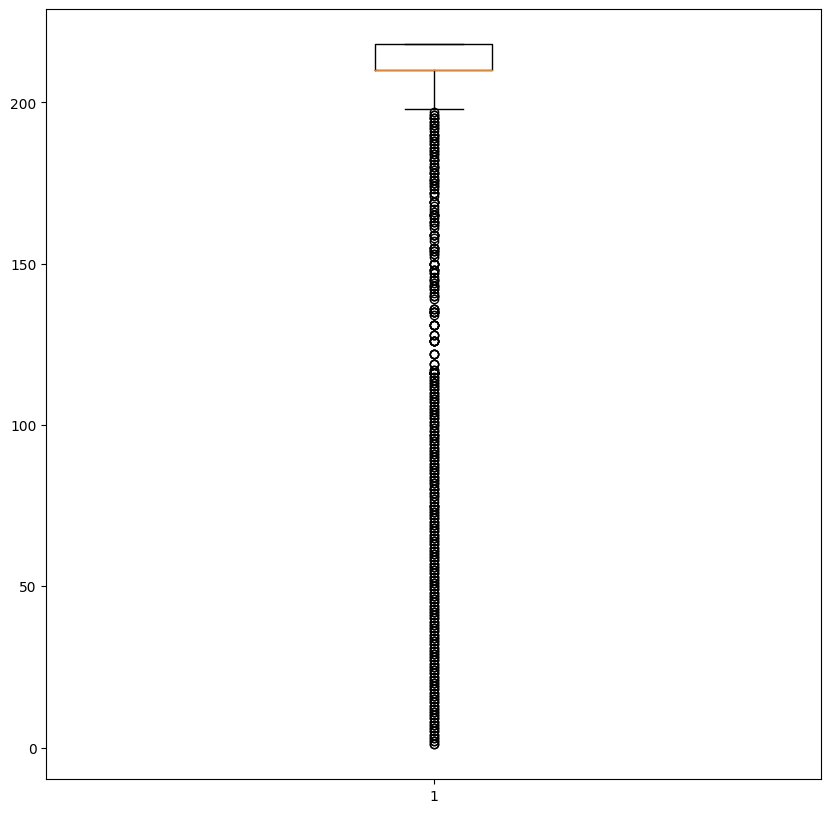

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))
plt.boxplot(df['quality_of_faculty'])

plt.show()

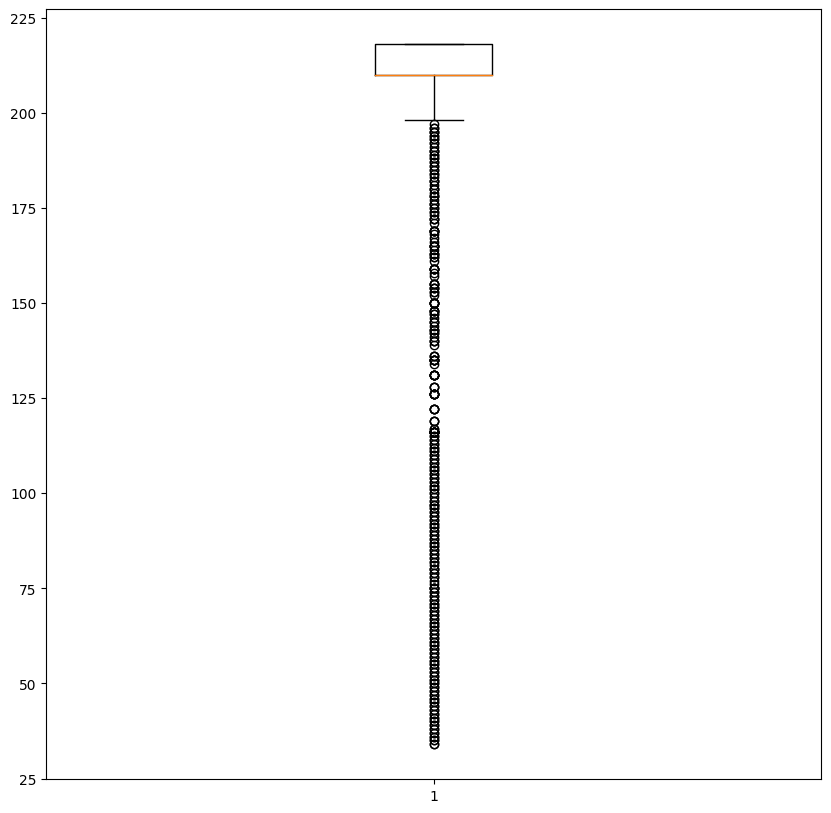

In [5]:
import matplotlib.pyplot as plt
import numpy as np
mean = df["quality_of_faculty"].mean()
std_deviation = df["quality_of_faculty"].std()
threshold = 3 * std_deviation

outliers = [x for x in df["quality_of_faculty"] if abs(x - mean) > threshold]
len(outliers)
out = np.asarray(outliers)
df = df[df.quality_of_faculty.isin (out) == False ]
plt.figure(figsize=(10, 10))
plt.boxplot(df['quality_of_faculty'])

plt.show()

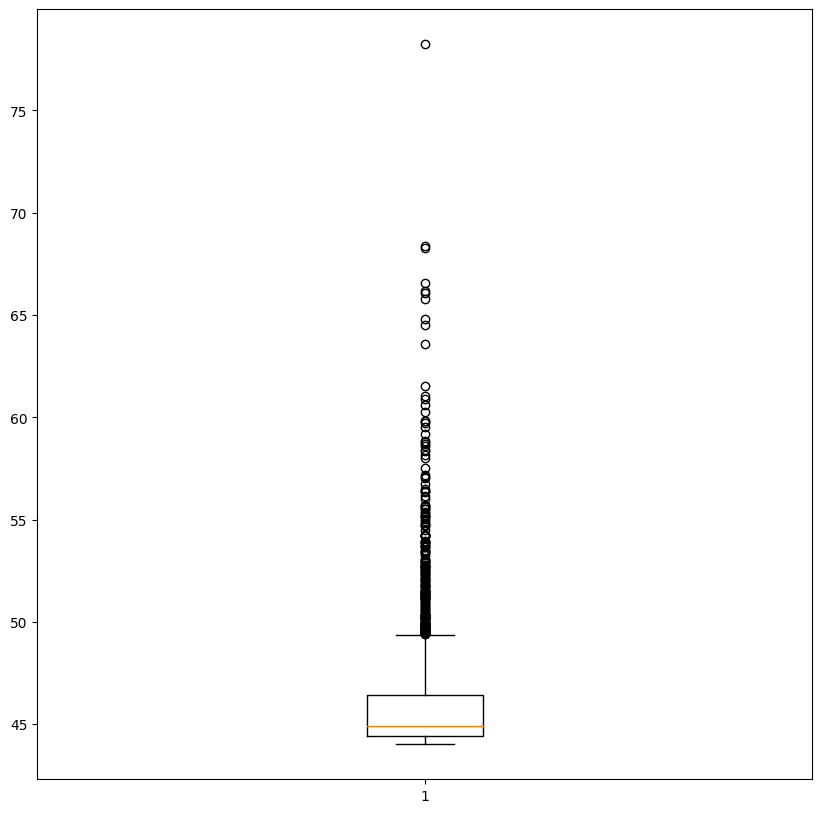

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))
plt.boxplot(df['score'])

plt.show()

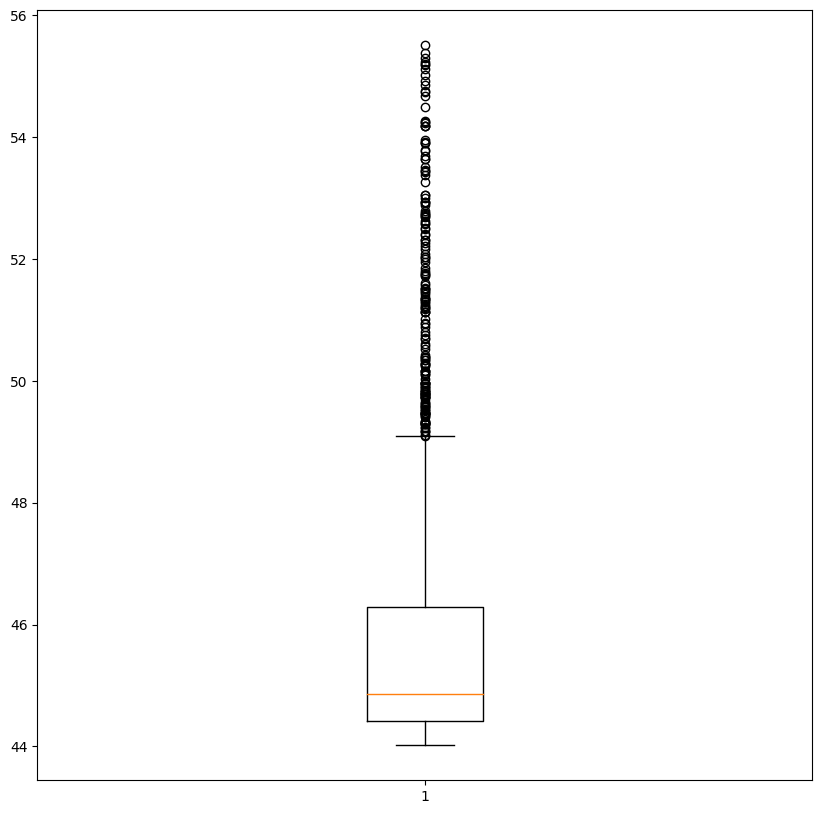

In [7]:
mean = df["score"].mean()
std_deviation = df["score"].std()
threshold = 3 * std_deviation

outliers = [x for x in df["score"] if abs(x - mean) > threshold]
len(outliers)
out = np.asarray(outliers)
df = df[df.score.isin (out) == False ]
plt.figure(figsize=(10, 10))
plt.boxplot(df['score'])

plt.show()

Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

df_cluster = df.copy()

###############################################################
# Пункт 4
###############################################################

min_max_scaler = MinMaxScaler() # MinMaxScaler
df_min_max = df_cluster.copy()
num_features = df.select_dtypes(include=['int64']).columns
df_min_max[num_features] = min_max_scaler.fit_transform(df[num_features])
df_min_max["publications"].unique()

array([0.04298874, 0.03172979, 0.00614125, 0.01637666, 0.01125896,
       0.00307062, 0.07778915, 0.07574207, 0.22313204, 0.02354145,
       0.03787103, 0.00818833, 0.01842375, 0.04503582, 0.03582395,
       0.03377687, 0.03275333, 0.01432958, 0.03480041, 0.09109519,
       0.04401228, 0.02149437, 0.0542477 , 0.10235415, 0.0419652 ,
       0.08290686, 0.14431934, 0.02456499, 0.07369498, 0.05731832,
       0.0174002 , 0.04605937, 0.06243603, 0.11463664, 0.10542477,
       0.03070624, 0.02763562, 0.12998976, 0.02251791, 0.13613101,
       0.08495394, 0.20470829, 0.06653019, 0.1136131 , 0.03889458,
       0.07062436, 0.05117707, 0.12077789, 0.12282497, 0.23439099,
       0.16069601, 0.05834186, 0.08700102, 0.06345957, 0.14636643,
       0.44319345, 0.05322416, 0.0593654 , 0.06038895, 0.27840328,
       0.06857728, 0.04094166, 0.09007165, 0.05220061, 0.06550665,
       0.07267144, 0.08188332, 0.14124872, 0.04912999, 0.16683726,
       0.06960082, 0.16274309, 0.03991812, 0.09825998, 0.11975

In [9]:
standard_scaler = StandardScaler() # StandardScaler
df_std = df_cluster.copy()
df_std[num_features] = standard_scaler.fit_transform(df[num_features])
df_std["broad_impact"].unique()

array([ 155.,   46.,   50.,   19.,   63.,   41.,   94.,   77.,  238.,
        215.,   37.,   66.,   59.,   40.,  112.,   36.,  102.,   73.,
         70.,   34.,   51.,   97.,   48.,  101.,   81.,   56.,  151.,
        162.,   49.,   54.,  207.,  124.,  180.,  145.,  326.,   45.,
         99.,   30.,  137.,  251.,  121.,   74.,  100.,  106.,  195.,
        472.,  211.,   90.,   88.,   68.,  110.,  118.,   79.,  306.,
        293.,  192.,   61.,   64.,  129.,   92.,  114.,  158.,  107.,
        135.,   44.,   86.,  126.,  164.,  437.,  176.,  318.,  141.,
        117.,  196.,  355.,  132.,  917.,  173.,  628.,  415.,  224.,
        203.,  295.,  185.,  230.,  160.,  128.,  234.,  339.,  161.,
        201.,  290.,  247.,  189.,  249.,  288.,  169.,  200.,  322.,
        272.,  395.,  277.,  220.,  184.,  523.,  266.,  261.,  274.,
        281.,  245.,  256.,  585.,  756.,  349.,  313.,  569.,  372.,
        346.,  265.,  596.,  832.,  504.,  420.,  819.,  375.,  402.,
        386.,  543.,

In [10]:
df_cluster[num_features] = df_std[num_features] # Замена значений
df_cluster[num_features] = df_min_max[num_features]
df_cluster

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
254,0.007353,Peking University,China,0.000000,0.966006,0.027422,0.956284,0.042989,0.138144,0.282248,155.0,0.002309,55.30,0.0
255,0.008403,University of Edinburgh,United Kingdom,0.017544,0.079320,0.202925,0.005464,0.031730,0.021649,0.033206,46.0,0.348730,55.20,0.0
256,0.009454,"University of California, Davis",USA,0.153509,0.093484,0.314442,0.300546,0.006141,0.010309,0.011494,50.0,0.072748,55.18,0.0
257,0.010504,Washington University in St. Louis,USA,0.157895,0.232295,0.228519,0.420765,0.016377,0.000000,0.006386,19.0,0.203233,54.93,0.0
258,0.011555,University of Florida,USA,0.162281,0.560907,0.510055,0.327869,0.011259,0.050515,0.029374,63.0,0.003464,54.76,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0.995798,University of the Algarve,Portugal,0.026316,1.000000,1.000000,1.000000,0.924258,0.849485,1.000000,969.0,0.936490,44.03,1.0
2196,0.996849,Alexandria University,Egypt,0.013158,0.628895,0.998172,1.000000,0.996929,0.914433,0.786718,981.0,1.000000,44.03,1.0
2197,0.997899,Federal University of Ceará,Brazil,0.074561,1.000000,0.967093,1.000000,0.825998,0.826804,1.000000,975.0,0.945727,44.03,1.0
2198,0.998950,University of A Coruña,Spain,0.171053,1.000000,1.000000,1.000000,0.883316,0.982474,1.000000,975.0,0.745958,44.02,1.0


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

###############################################################
# Пункт 5
###############################################################

df_cluster['institution'] = le.fit_transform(df_cluster['institution'])
df_cluster['institution'].unique()

array([403, 641, 602, 936, 650, 593, 881, 621, 771, 348,  42, 404, 713,
       566, 923, 525, 244, 359, 720, 810, 120, 625, 603,  49, 287, 156,
       538, 908, 513, 537, 921, 439, 254, 266, 498, 245, 847, 527, 725,
       583, 509, 436, 121,  57, 559, 858, 516,  17, 959, 428, 510, 670,
       778, 308, 206, 914, 802, 288, 274, 155,   3, 572,  27, 563, 592,
       919, 684, 492, 663, 258, 425, 259, 849, 323, 622, 745,  10, 159,
       658, 728, 918, 398, 301, 581, 862, 922, 933, 836, 772, 332, 764,
       392, 697, 941, 256, 574, 673, 207, 191, 145, 876,  20, 161, 674,
       606, 556, 197, 601, 313, 659, 665, 316, 485, 955, 835, 174, 390,
       842, 618, 827, 667, 154, 729, 213, 718, 784, 762, 406, 491, 184,
       147, 846, 916, 937, 724, 696, 463, 735, 506,  95, 620, 536, 580,
        74, 688, 494, 889, 963, 656, 721,  54, 748, 702, 781, 644, 418,
       243, 284, 327, 680, 582, 714, 233, 605, 234,   7, 896, 272, 855,
       369, 365,  89, 873, 691, 624, 539, 773,  45, 110, 424, 85

In [12]:
df_cluster

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
254,0.007353,403,China,0.000000,0.966006,0.027422,0.956284,0.042989,0.138144,0.282248,155.0,0.002309,55.30,0.0
255,0.008403,641,United Kingdom,0.017544,0.079320,0.202925,0.005464,0.031730,0.021649,0.033206,46.0,0.348730,55.20,0.0
256,0.009454,602,USA,0.153509,0.093484,0.314442,0.300546,0.006141,0.010309,0.011494,50.0,0.072748,55.18,0.0
257,0.010504,936,USA,0.157895,0.232295,0.228519,0.420765,0.016377,0.000000,0.006386,19.0,0.203233,54.93,0.0
258,0.011555,650,USA,0.162281,0.560907,0.510055,0.327869,0.011259,0.050515,0.029374,63.0,0.003464,54.76,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0.995798,909,Portugal,0.026316,1.000000,1.000000,1.000000,0.924258,0.849485,1.000000,969.0,0.936490,44.03,1.0
2196,0.996849,11,Egypt,0.013158,0.628895,0.998172,1.000000,0.996929,0.914433,0.786718,981.0,1.000000,44.03,1.0
2197,0.997899,126,Brazil,0.074561,1.000000,0.967093,1.000000,0.825998,0.826804,1.000000,975.0,0.945727,44.03,1.0
2198,0.998950,551,Spain,0.171053,1.000000,1.000000,1.000000,0.883316,0.982474,1.000000,975.0,0.745958,44.02,1.0


In [93]:
df_cluster1 = df_cluster[["world_rank","quality_of_education"]]
df_cluster1

,world_rank,quality_of_education
254,0.007353,0.966006
255,0.008403,0.079320
256,0.009454,0.093484
257,0.010504,0.232295
258,0.011555,0.560907
...,...,...
2195,0.995798,1.000000
2196,0.996849,0.628895
2197,0.997899,1.000000
2198,0.998950,1.000000


<Axes: >

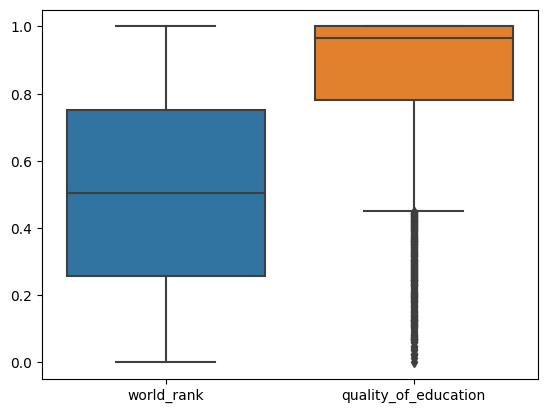

In [94]:
import seaborn as sns
sns.boxplot(df_cluster1)

In [99]:
Q1 = df_cluster1["world_rank"].quantile(0.25)
Q3 = df_cluster1['world_rank'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers1 = [x1 for x1 in df_cluster1["world_rank"] if ((x1 < lower) or (x1 > upper))]#При помощи межквартильного размаха

print("Потенциальные выбросы:", outliers1)

Потенциальные выбросы: []


In [98]:
Q1 = df_cluster1["quality_of_education"].quantile(0.25)
Q3 = df_cluster1['quality_of_education'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers2 = [x1 for x1 in df_cluster1["quality_of_education"] if ((x1 < lower) or (x1 > upper))]#При помощи межквартильного размаха

print("Потенциальные выбросы:", outliers2)

Потенциальные выбросы: [0.0793201133144476, 0.0934844192634561, 0.2322946175637394, 0.20113314447592068, 0.2096317280453258, 0.17280453257790368, 0.2804532577903683, 0.062322946175637405, 0.23796033994334279, 0.24079320113314448, 0.2662889518413598, 0.07365439093484419, 0.3172804532577904, 0.1388101983002833, 0.13031161473087818, 0.2747875354107649, 0.11898016997167138, 0.0821529745042493, 0.3087818696883853, 0.1529745042492918, 0.2719546742209632, 0.16997167138810199, 0.24929178470254956, 0.1218130311614731, 0.039660056657223795, 0.3201133144475921, 0.3456090651558074, 0.025495750708215296, 0.0679886685552408, 0.08498583569405099, 0.4220963172804533, 0.11331444759206799, 0.07648725212464591, 0.1104815864022663, 0.3541076487252125, 0.2776203966005666, 0.18413597733711048, 0.3342776203966006, 0.2634560906515581, 0.3739376770538244, 0.1359773371104816, 0.4419263456090652, 0.2946175637393768, 0.1501416430594901, 0.3484419263456091, 0.2861189801699717, 0.4277620396600567, 0.291784702549575

In [100]:
import scipy.stats as stats

Q1 = df_cluster1.quantile(q=.25)
Q3 = df_cluster1.quantile(q=.75)
IQR = df_cluster1.apply(stats.iqr)

df_clean = df_cluster1[~((df_cluster1 < (Q1-1.5*IQR)) | (df_cluster1 > (Q3+1.5*IQR))).any(axis=1)]
df_clean

,world_rank,quality_of_education
254,0.007353,0.966006
258,0.011555,0.560907
263,0.016807,0.518414
266,0.019958,0.784703
273,0.027311,0.966006
...,...,...
2195,0.995798,1.000000
2196,0.996849,0.628895
2197,0.997899,1.000000
2198,0.998950,1.000000


<Axes: >

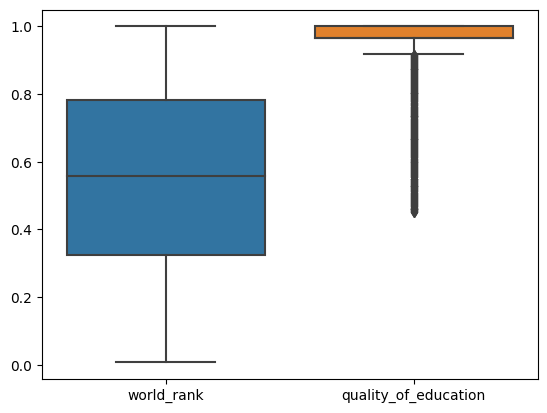

In [101]:
sns.boxplot(df_clean)

Text(0.5, 1.0, 'Распределение данных в двумерном пространстве')

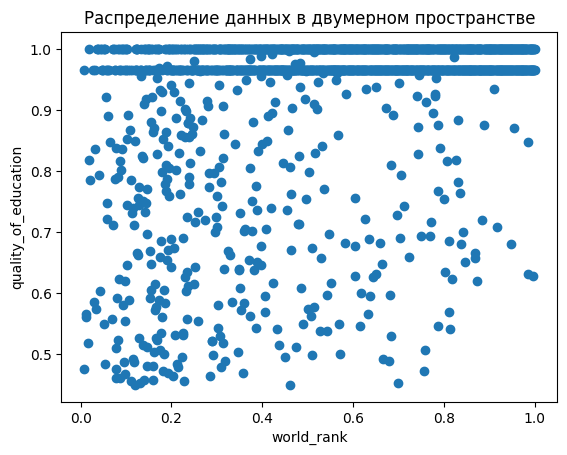

In [103]:
df_cluster1 = df_clean
plt.scatter(df_cluster1["world_rank"], df_cluster1["quality_of_education"])
plt.xlabel('world_rank')
plt.ylabel('quality_of_education')
plt.title('Распределение данных в двумерном пространстве')

In [104]:
X = df_cluster1[["world_rank","quality_of_education"]]
X

,world_rank,quality_of_education
254,0.007353,0.966006
258,0.011555,0.560907
263,0.016807,0.518414
266,0.019958,0.784703
273,0.027311,0.966006
...,...,...
2195,0.995798,1.000000
2196,0.996849,0.628895
2197,0.997899,1.000000
2198,0.998950,1.000000


In [105]:
# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=2)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
print(cluster_centers) # центры кластеров в двумерном пространстве

[[0.76714518 0.96069527]
 [0.30274901 0.88157249]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


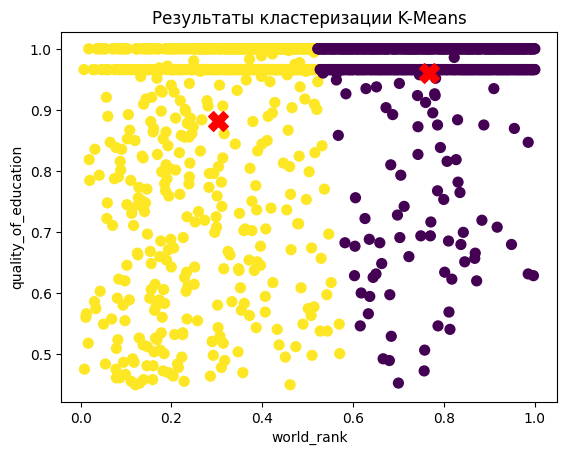

In [106]:
# Визуализируем результаты кластеризации двумерной кластеризации
plt.scatter(df_cluster1["world_rank"], df_cluster1["quality_of_education"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('world_rank')
plt.ylabel('quality_of_education')
plt.title('Результаты кластеризации K-Means')
plt.show()

In [ ]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

In [22]:
print(cluster_centers)

[[0.63736131 0.35584974]
 [0.95838918 0.94940684]]


In [23]:
print(cluster_labels)

[1 0 0 ... 1 1 1]


Оптимальное число кластеров Calinski Harabasz Score 10, с баллом 3581.5005848065107
Оптимальное число кластеров Silhouette Score 2, с баллом 0.5283293268401825
Оптимальное число кластеров Davies Bouldin Score 6, с баллом 0.6256090017288144


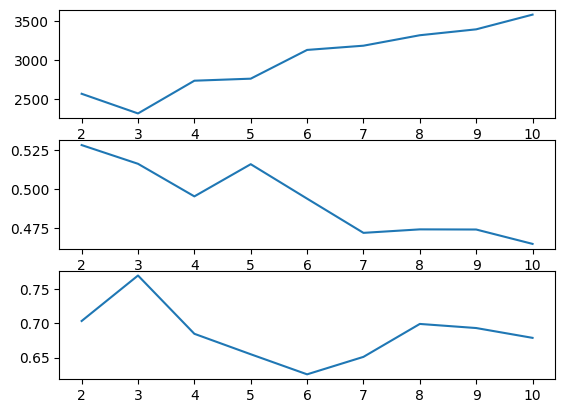

In [107]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

score_1 = []
score_2 = []
score_3 = []
for k in range(2,11):
  kmeans = KMeans(n_clusters= k,n_init = 10,random_state = 42)
  kmeans.fit(df_cluster1)
  score_1.append(calinski_harabasz_score(df_cluster1,kmeans.labels_))
  score_2.append(silhouette_score(df_cluster1,kmeans.labels_))
  score_3.append(davies_bouldin_score(df_cluster1,kmeans.labels_))
print(f"Оптимальное число кластеров Calinski Harabasz Score {score_1.index(max(score_1)) + 2}, с баллом {max(score_1)}")
print(f"Оптимальное число кластеров Silhouette Score {score_2.index(max(score_2)) + 2}, с баллом {max(score_2)}")
print(f"Оптимальное число кластеров Davies Bouldin Score {score_3.index(min(score_3)) + 2}, с баллом {min(score_3)}")
fig, axs = plt.subplots(nrows= 3 , ncols= 1 )
axs[0].plot(range(2, 11), score_1)
axs[1].plot(range(2, 11), score_2)
axs[2].plot(range(2, 11), score_3)


In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

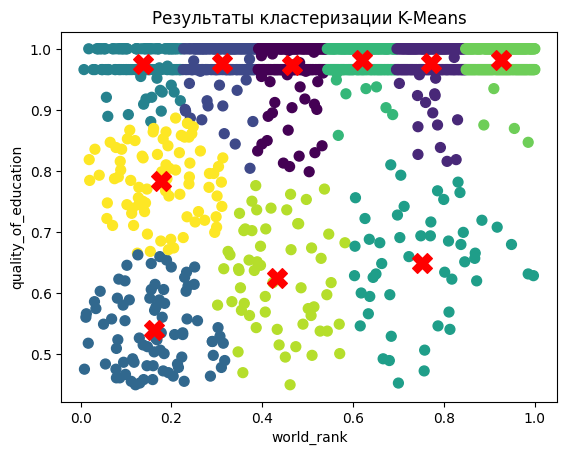

In [108]:
kmeans = KMeans(n_clusters= 10,n_init = 10,random_state = 42)
kmeans.fit(df_cluster1)


cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
plt.scatter(df_cluster1['world_rank'], df_cluster1['quality_of_education'], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('world_rank')
plt.ylabel('quality_of_education')
plt.title('Результаты кластеризации K-Means')
plt.show()

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

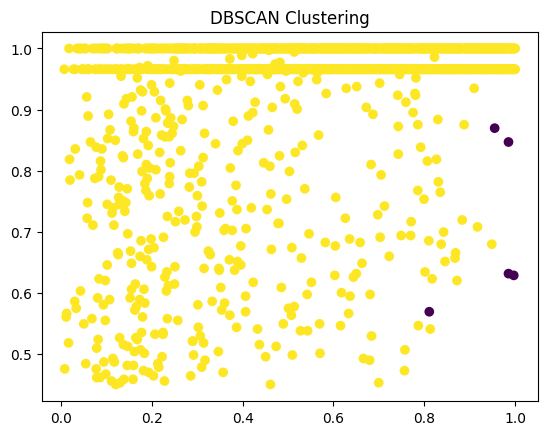

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

x_scaler = StandardScaler().fit_transform(X)

# Инициализация и обучение модели DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=5)
dbscan.fit(x_scaler)

# Получение меток кластеров для каждой точки (-1 означает выбросы)
labels = dbscan.labels_

# Визуализация результатов, темные точки - выбросы
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

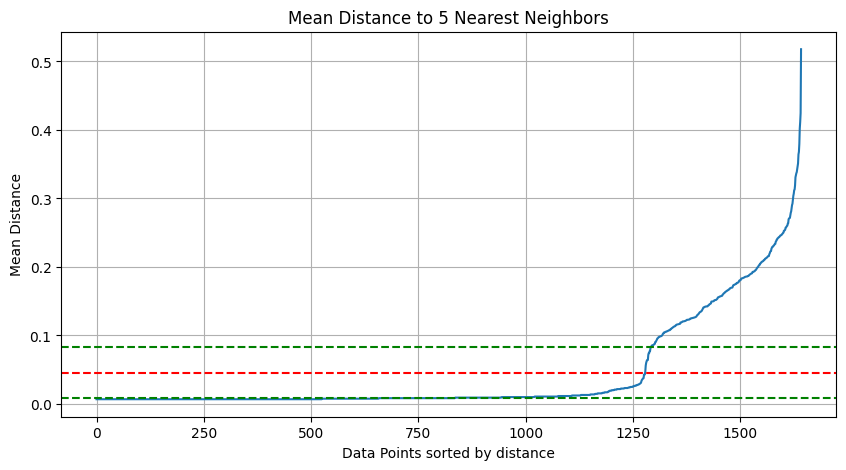

Оптимальный EPS = 0.04556441105956019


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Создаем пустой список, в который будем добавлять средние расстояния
neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(X_scaled):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1 - v2) for j, v2 in enumerate(X_scaled) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

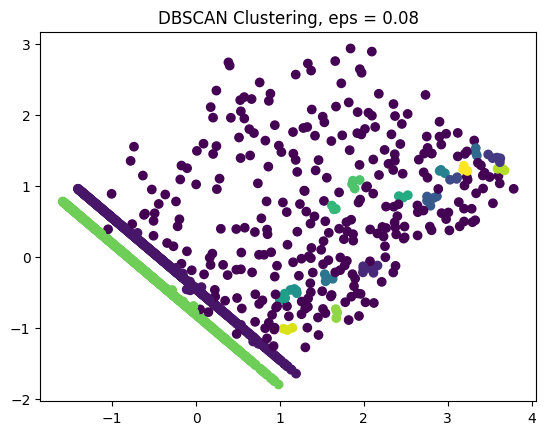

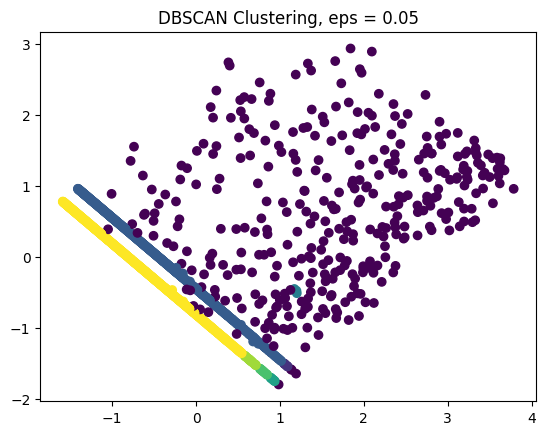

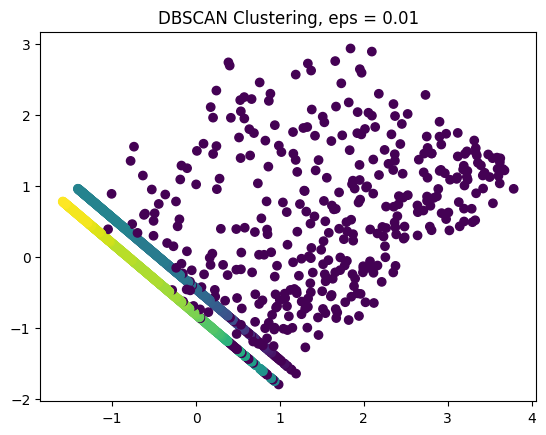

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Создаем объект PCA и снижаем размерность до 2 компонент, чтобы визуализировать на двумерном графике
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

for eps in [np.mean(neighbours) + np.std(neighbours) / 2, np.mean(neighbours), np.mean(neighbours) - np.std(neighbours) / 2]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=3)
  dbscan.fit(X_scaled)
  labels = dbscan.labels_

  # Визуализация результатов, темные точки - выбросы
  plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show()

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

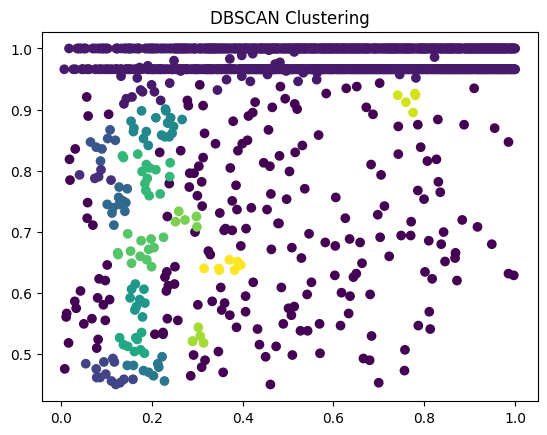

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

x_scaler = StandardScaler().fit_transform(X)

# Инициализация и обучение модели DBSCAN
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan.fit(x_scaler)

# Получение меток кластеров для каждой точки (-1 означает выбросы)
labels = dbscan.labels_

# Визуализация результатов, темные точки - выбросы
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

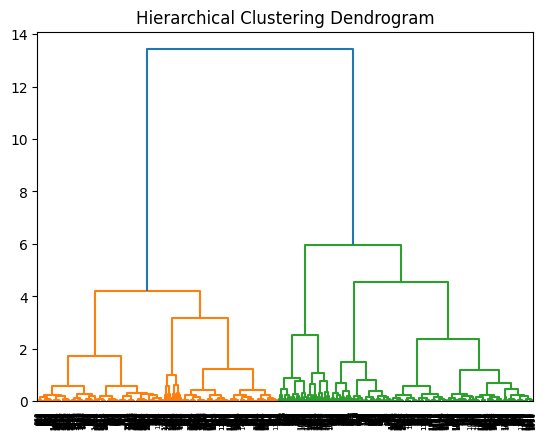

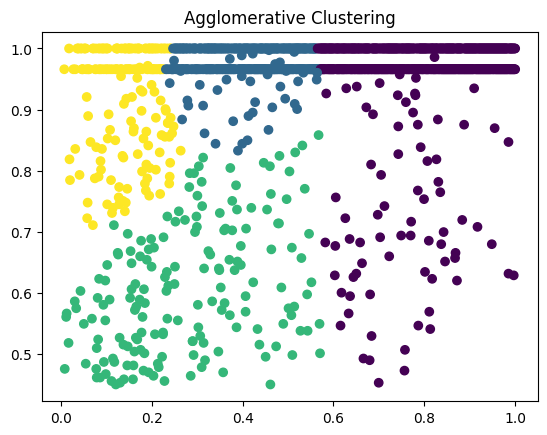

In [113]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Инициализация и обучение модели иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(X)

# Визуализация дендрограммы
from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Визуализация результатов кластеризации
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

In [ ]:
!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - грaфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here